### Logistic Regression

<hr>
<h4>Step 1: Import Required Libraries</h4>

<p style="font-size:12px">
We start by importing the essential Python libraries for building and evaluating a <b>Logistic Regression</b> model:
<ul>
<li><code>pandas</code> and <code>numpy</code> — Data manipulation and analysis</li>
<li><code>train_test_split</code> — Split dataset into training and testing sets</li>
<li><code>StandardScaler</code> — Feature scaling for better model convergence</li>
<li><code>LogisticRegression</code> — Core classification model</li>
<li><code>confusion_matrix</code>, <code>classification_report</code>, <code>roc_auc_score</code>, <code>roc_curve</code> — Model evaluation metrics</li>
<li><code>matplotlib.pyplot</code> — Data visualization</li>
</ul>
</p>
<hr>


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

<hr>
<h4>Step 2: Load Dataset</h4>

<p style="font-size:12px">
We load the built-in <b>Breast Cancer</b> dataset from <code>scikit-learn</code> using <code>load_breast_cancer()</code>.  
This dataset contains features computed from digitized images of breast masses, used for binary classification:  
<ul>
<li><b>569 samples</b> and <b>30 numerical features</b></li>
<li>Target variable: <code>0</code> = Malignant, <code>1</code> = Benign</li>
<li>No missing values — ready for modeling</li>
</ul>
</p>
<hr>


In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

<hr>
<h4>Step 3: Create Feature DataFrame</h4>

<p style="font-size:12px">
We convert the dataset's <code>data</code> array into a <code>pandas DataFrame</code> called <b>X</b>,  
assigning <code>data.feature_names</code> as the column names.  
This structure makes feature manipulation, exploration, and scaling much easier in later steps.
</p>
<hr>


In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)

<hr>
<h4>Step 4: Create Target Series</h4>

<p style="font-size:12px">
We create the target variable <b>y</b> as a <code>pandas Series</code> from <code>data.target</code>.  
This Series contains the classification labels (e.g., 0 for malignant, 1 for benign)  
that our logistic regression model will be trained to predict.
</p>
<hr>


In [4]:
y = pd.Series(data.target)

<hr>
<h4>Step 5: Split Data into Training and Testing Sets</h4>

<p style="font-size:12px">
We split the dataset into <b>training</b> (80%) and <b>testing</b> (20%) subsets using  
<code>train_test_split</code>. Setting <code>random_state=42</code> ensures reproducibility,  
so the same split will be used every time the code runs.  
Training data is used to fit the model, and testing data is used to evaluate its performance.
</p>
<hr>


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<hr>
<h4>Step 6: Feature Scaling</h4>

<p style="font-size:12px">
We standardize the features using <code>StandardScaler</code> so that all variables have  
a mean of 0 and a standard deviation of 1. This is crucial for algorithms like  
logistic regression to perform optimally, as it ensures that features with  
larger numeric ranges do not dominate the model.
</p>
<hr>


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<hr>
<h4>Step 7: Initialize Logistic Regression Model</h4>

<p style="font-size:12px">
We create an instance of the <code>LogisticRegression</code> class with  
<code>max_iter=10000</code> to ensure the model has enough iterations to converge.  
This step prepares the logistic regression classifier for training.
</p>
<hr>


In [7]:
log_reg = LogisticRegression(max_iter=10000)


<hr>
<h4>Step 8: Train the Logistic Regression Model</h4>

<p style="font-size:12px">
We fit the logistic regression model to the scaled training data (<code>X_train_scaled</code>)  
and the corresponding labels (<code>y_train</code>).  
This process learns the optimal coefficients for predicting the target variable.
</p>
<hr>


In [8]:
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


<hr>
<h4>Step 9: Generate Predictions</h4>

<p style="font-size:12px">
Using the trained logistic regression model,  
we predict the class labels (<code>y_pred</code>) for the scaled test data (<code>X_test_scaled</code>).  
These predictions will be compared against the actual test labels for evaluation.
</p>
<hr>


In [9]:
y_pred = log_reg.predict(X_test_scaled)


<hr>
<h4>Step 10: Predict Class Probabilities</h4>

<p style="font-size:12px">
Instead of just predicting class labels,  
we also predict the probability of each observation belonging to the positive class (malignant).  
The <code>predict_proba()</code> method returns probabilities for both classes,  
and we extract the second column (<code>[:, 1]</code>) which corresponds to the positive class.
</p>
<hr>


In [10]:
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

<hr>
<h4>Step 11: Confusion Matrix</h4>

<p style="font-size:12px">
We compute the <strong>Confusion Matrix</strong> to evaluate model performance in terms of  
True Positives, True Negatives, False Positives, and False Negatives.  
This helps us understand how well the model distinguishes between malignant and benign cases.
</p>
<hr>


In [11]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[41  2]
 [ 1 70]]


<hr>
<h4>Step 12: Classification Report</h4>

<p style="font-size:12px">
We generate the <strong>Classification Report</strong> which includes key metrics:  
- <strong>Precision</strong>: The proportion of correctly predicted positives out of all predicted positives.  
- <strong>Recall (Sensitivity)</strong>: The proportion of correctly predicted positives out of all actual positives.  
- <strong>F1-score</strong>: Harmonic mean of precision and recall.  
- <strong>Support</strong>: Number of actual occurrences of each class.  
This provides a more detailed view of classification performance beyond accuracy.
</p>
<hr>


In [12]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<hr>
<h4>Step 13: ROC-AUC Score</h4>

<p style="font-size:12px">
We calculate the <strong>ROC-AUC Score</strong>, which measures the model's ability to  
separate the two classes across all possible classification thresholds.  
A score closer to <code>1.0</code> indicates excellent separability,  
while a score around <code>0.5</code> suggests random guessing.
</p>
<hr>


In [13]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.99737962659679


<hr>
<h4>Step 14: ROC Curve Visualization</h4>

<p style="font-size:12px">
We plot the <strong>ROC Curve</strong> (Receiver Operating Characteristic) to visualize  
the trade-off between the <em>True Positive Rate</em> (TPR) and the <em>False Positive Rate</em> (FPR)  
at various classification thresholds.  
The diagonal dashed line represents random guessing,  
while curves closer to the top-left corner indicate better performance.
</p>
<hr>


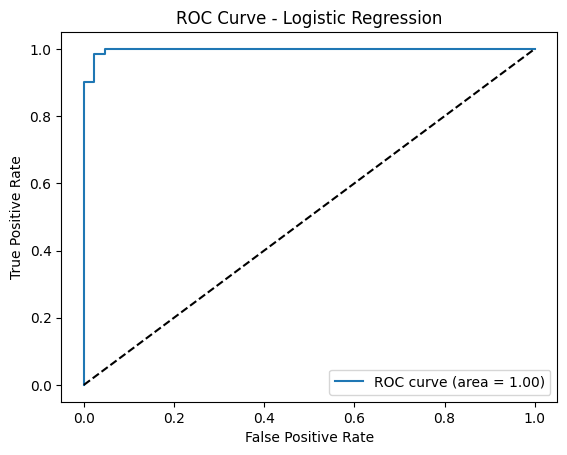

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

<hr>
<h4>Step 8: Sigmoid Function Definition</h4>

<p style="font-size:12px">
We define the <strong>Sigmoid Function</strong>, a mathematical function that maps any real-valued number  
into the range <code>(0, 1)</code>.  
In logistic regression, the sigmoid function transforms the linear combination of features into  
a probability score that can be interpreted as the likelihood of belonging to the positive class.
</p>
<hr>


In [17]:
# Step 8: Sigmoid function demonstration
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

<hr>
<h4>Step 9: Visualizing the Sigmoid Function</h4>

<p style="font-size:12px">
We create a range of <code>z</code> values from -10 to 10 and pass them through the  
<strong>Sigmoid Function</strong> to observe its characteristic S-shaped curve.  
This visualization demonstrates how the function compresses extreme negative values close to 0  
and extreme positive values close to 1, with a midpoint at <code>z = 0</code> mapping to 0.5 probability.
</p>
<hr>


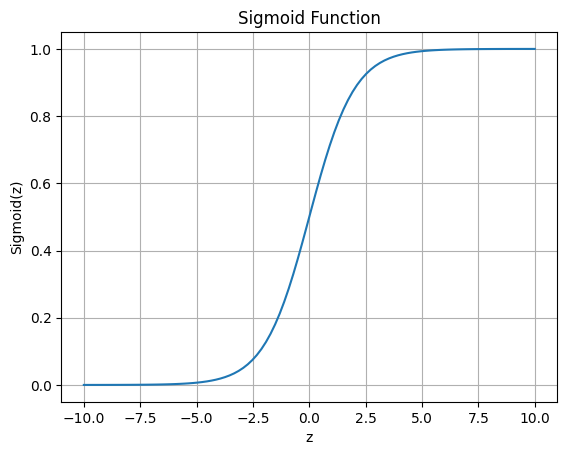

In [18]:
z_example = np.linspace(-10, 10, 100)
plt.plot(z_example, sigmoid(z_example))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()